In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("./data/online_shoppers_intention.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
data["Weekend"] = data["Weekend"]*1
data["Revenue"] = data["Revenue"]*1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
data["Weekend"] = data["Weekend"].astype("int64")
data["Revenue"] = data["Revenue"].astype("int64")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


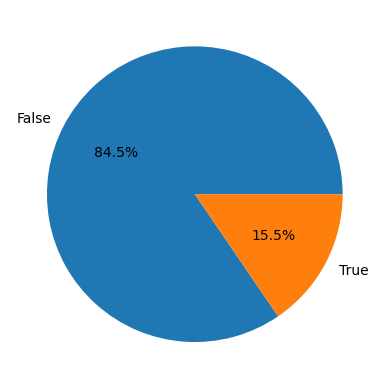

In [9]:
plt.pie(data["Revenue"].value_counts(),labels=["False", "True"],autopct='%1.1f%%')
plt.show()

In [10]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [11]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [12]:
data.duplicated().sum()

125

In [13]:
data=data.drop_duplicates()

In [14]:
data.duplicated().sum()

0

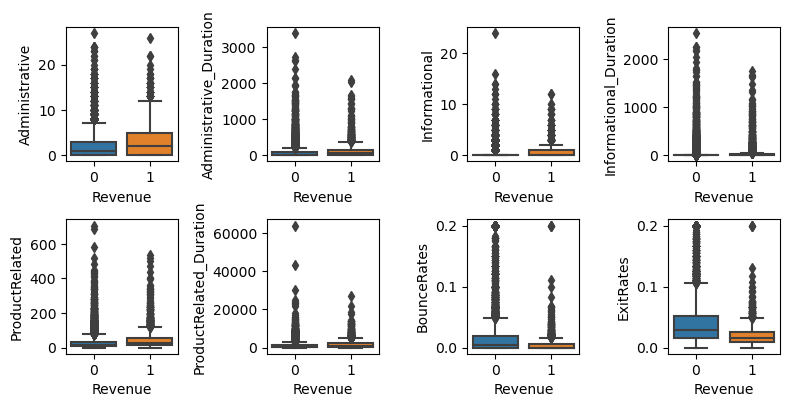

In [15]:
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(2, 4, 1)
ax2 = fig.add_subplot(2, 4, 2)
ax3 = fig.add_subplot(2, 4, 3)
ax4 = fig.add_subplot(2, 4, 4)
ax5 = fig.add_subplot(2, 4, 5)
ax6 = fig.add_subplot(2, 4, 6)
ax7 = fig.add_subplot(2, 4, 7)
ax8 = fig.add_subplot(2, 4, 8)

sns.boxplot(data=data, x = 'Revenue', y = 'Administrative', ax=ax1)
sns.boxplot(data=data, x = 'Revenue', y = 'Administrative_Duration', ax=ax2)
sns.boxplot(data=data, x = 'Revenue', y = 'Informational', ax=ax3)
sns.boxplot(data=data, x = 'Revenue', y = 'Informational_Duration', ax=ax4)
sns.boxplot(data=data, x = 'Revenue', y = 'ProductRelated', ax=ax5)
sns.boxplot(data=data, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6)
sns.boxplot(data=data, x = 'Revenue', y = 'BounceRates', ax=ax7)
sns.boxplot(data=data, x = 'Revenue', y = 'ExitRates', ax=ax8)

plt.tight_layout()
plt.show()

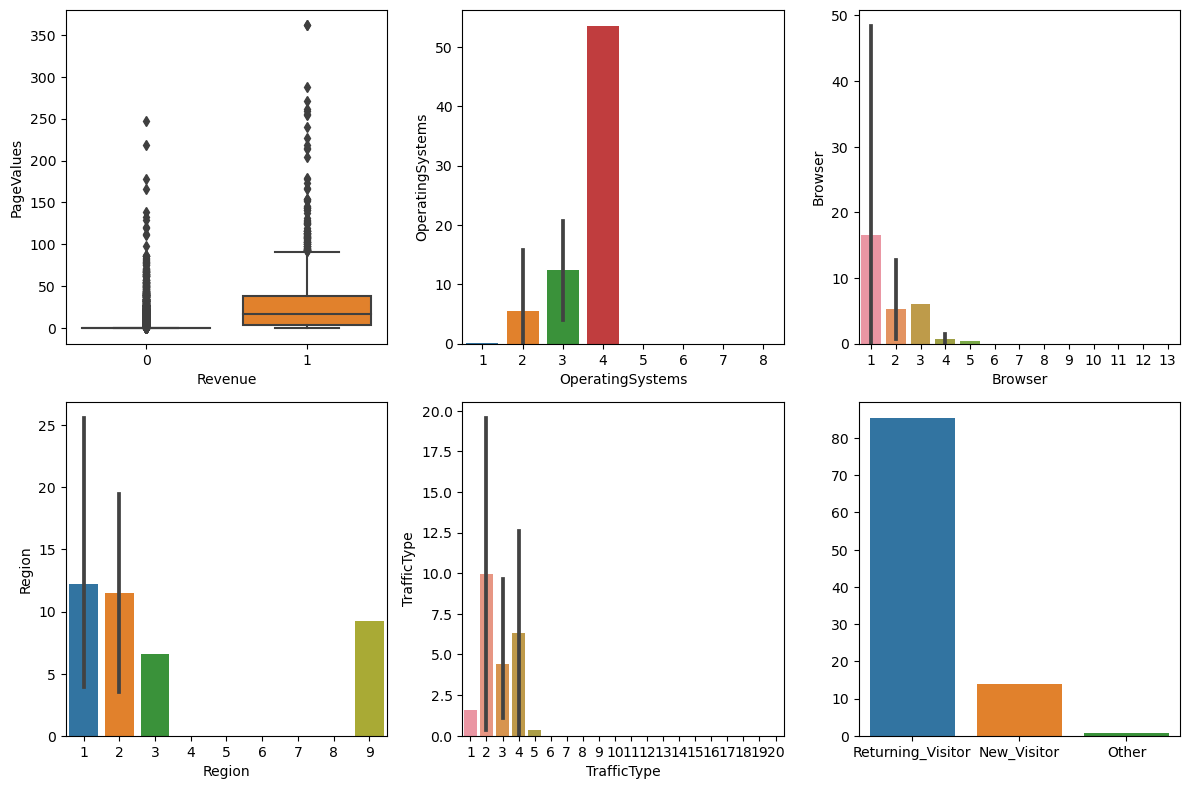

In [16]:
fig = plt.figure(figsize=(12,8))

ax9 = fig.add_subplot(2, 3, 1)
ax10 = fig.add_subplot(2, 3, 2)
ax11 = fig.add_subplot(2, 3, 3)
ax12 = fig.add_subplot(2, 3, 4)
ax13 = fig.add_subplot(2, 3, 5)
ax14 = fig.add_subplot(2, 3, 6)


sns.boxplot(data=data, x = 'Revenue', y = 'PageValues', ax=ax9)
sns.barplot(data = data, x=data['OperatingSystems'], y=data["OperatingSystems"].value_counts()/data["OperatingSystems"].value_counts().sum()*100, ax=ax10)
sns.barplot(data=data, x = data['Browser'], y = data["Browser"].value_counts()/data["Browser"].value_counts().sum()*100, ax=ax11)
sns.barplot(data=data, x = data['Region'], y = data["Region"].value_counts()/data["Region"].value_counts().sum()*100, ax=ax12)
sns.barplot(data=data, x = data['TrafficType'], y = data["TrafficType"].value_counts()/data["TrafficType"].value_counts().sum()*100, ax=ax13)
sns.barplot(data=data, x = data["VisitorType"].value_counts().keys() ,y=data["VisitorType"].value_counts().values / data["VisitorType"].value_counts().values.sum() * 100, ax=ax14)


plt.tight_layout()
plt.show()

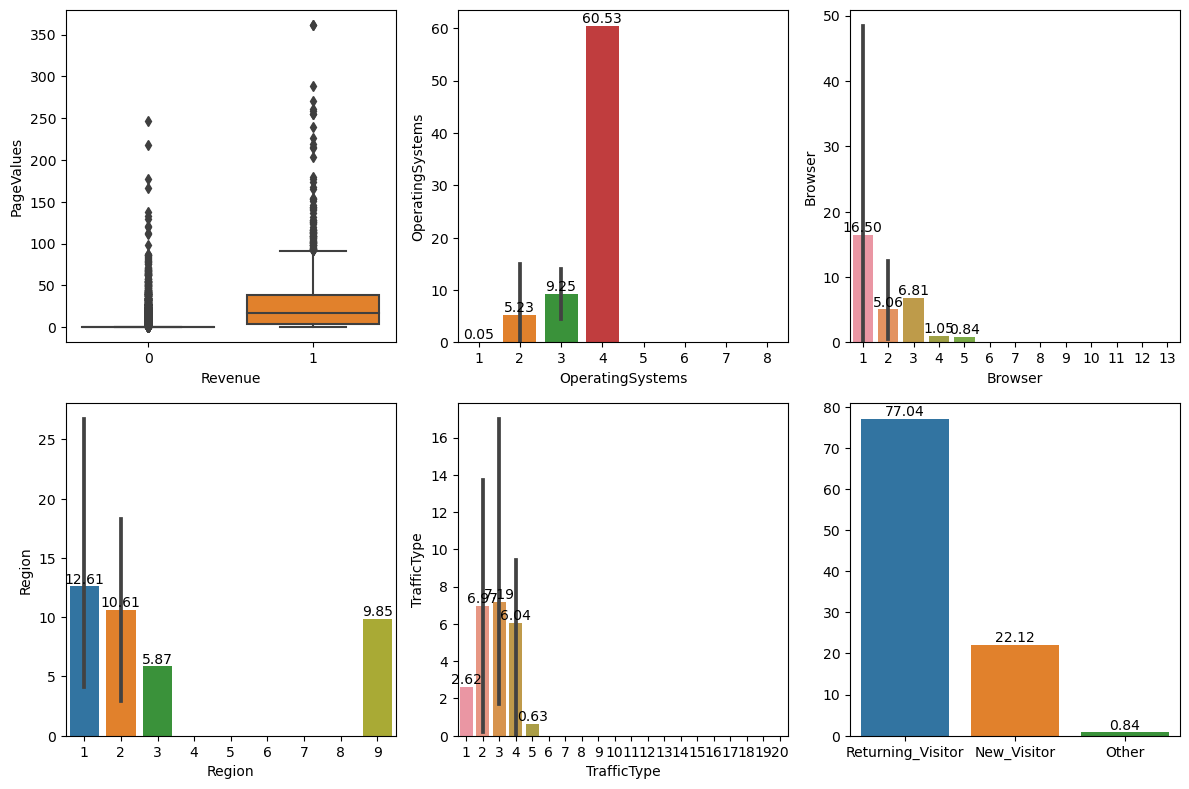

In [17]:
fig = plt.figure(figsize=(12,8))

ax15 = fig.add_subplot(2, 3, 1)
ax16 = fig.add_subplot(2, 3, 2)
ax17 = fig.add_subplot(2, 3, 3)
ax18 = fig.add_subplot(2, 3, 4)
ax19 = fig.add_subplot(2, 3, 5)
ax20 = fig.add_subplot(2, 3, 6)


sns.boxplot(data=data, x = 'Revenue', y = 'PageValues', ax=ax15)
xx=sns.barplot(data = data, x=data['OperatingSystems'], y=data["OperatingSystems"].loc[data["Revenue"]==1].value_counts()/data["OperatingSystems"].loc[data["Revenue"]==1].value_counts().sum()*100, ax=ax16)
xx.bar_label(ax16.containers[0], fontsize=10,fmt="%.2f")
xx=sns.barplot(data=data, x = data['Browser'], y = data["Browser"].loc[data["Revenue"]==1].value_counts()/data["Browser"].loc[data["Revenue"]==1].value_counts().sum()*100, ax=ax17)
xx.bar_label(ax17.containers[0], fontsize=10,fmt="%.2f")
xx=sns.barplot(data=data, x = data['Region'], y = data["Region"].loc[data["Revenue"]==1].value_counts()/data["Region"].loc[data["Revenue"]==1].value_counts().sum()*100, ax=ax18)
xx.bar_label(ax18.containers[0], fontsize=10,fmt="%.2f")
xx=sns.barplot(data=data, x = data['TrafficType'], y = data["TrafficType"].loc[data["Revenue"]==1].value_counts()/data["TrafficType"].loc[data["Revenue"]==1].value_counts().sum()*100, ax=ax19)
xx.bar_label(ax19.containers[0], fontsize=10,fmt="%.2f")
xx=sns.barplot(data=data, x = data["VisitorType"].value_counts().keys() ,y=data["VisitorType"].loc[data["Revenue"]==1].value_counts().values / data["VisitorType"].loc[data["Revenue"]==1].value_counts().values.sum() * 100, ax=ax20)
xx.bar_label(ax20.containers[0], fontsize=10,fmt="%.2f")

plt.tight_layout()
plt.show()

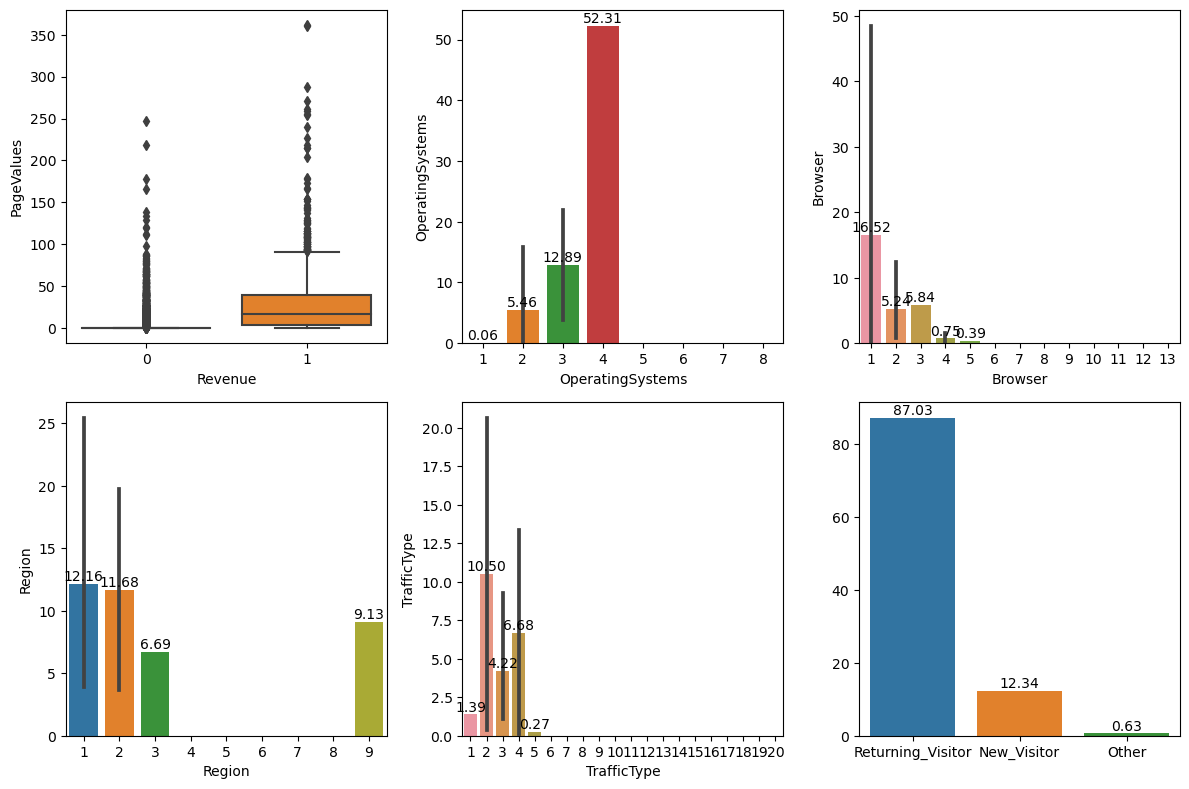

In [18]:
fig = plt.figure(figsize=(12,8))

ax21 = fig.add_subplot(2, 3, 1)
ax22 = fig.add_subplot(2, 3, 2)
ax23 = fig.add_subplot(2, 3, 3)
ax24 = fig.add_subplot(2, 3, 4)
ax25 = fig.add_subplot(2, 3, 5)
ax26 = fig.add_subplot(2, 3, 6)


sns.boxplot(data=data, x = 'Revenue', y = 'PageValues', ax=ax21)
xx=sns.barplot(data = data, x=data['OperatingSystems'], y=data["OperatingSystems"].loc[data["Revenue"]==0].value_counts()/data["OperatingSystems"].loc[data["Revenue"]==0].value_counts().sum()*100, ax=ax22)
xx.bar_label(ax22.containers[0], fontsize=10 ,fmt="%.2f")
xx=sns.barplot(data=data, x = data['Browser'], y = data["Browser"].loc[data["Revenue"]==0].value_counts()/data["Browser"].loc[data["Revenue"]==0].value_counts().sum()*100, ax=ax23)
xx.bar_label(ax23.containers[0], fontsize=10,fmt="%.2f")
xx=sns.barplot(data=data, x = data['Region'], y = data["Region"].loc[data["Revenue"]==0].value_counts()/data["Region"].loc[data["Revenue"]==0].value_counts().sum()*100, ax=ax24)
xx.bar_label(ax24.containers[0], fontsize=10,fmt="%.2f")
xx=sns.barplot(data=data, x = data['TrafficType'], y = data["TrafficType"].loc[data["Revenue"]==0].value_counts()/data["TrafficType"].loc[data["Revenue"]==0].value_counts().sum()*100, ax=ax25)
xx.bar_label(ax25.containers[0], fontsize=10,fmt="%.2f")
xx=sns.barplot(data=data, x = data["VisitorType"].value_counts().keys() ,y=data["VisitorType"].loc[data["Revenue"]==0].value_counts().values / data["VisitorType"].loc[data["Revenue"]==0].value_counts().values.sum() * 100, ax=ax26)
xx.bar_label(ax26.containers[0], fontsize=10,fmt="%.2f")

plt.tight_layout()
plt.show()

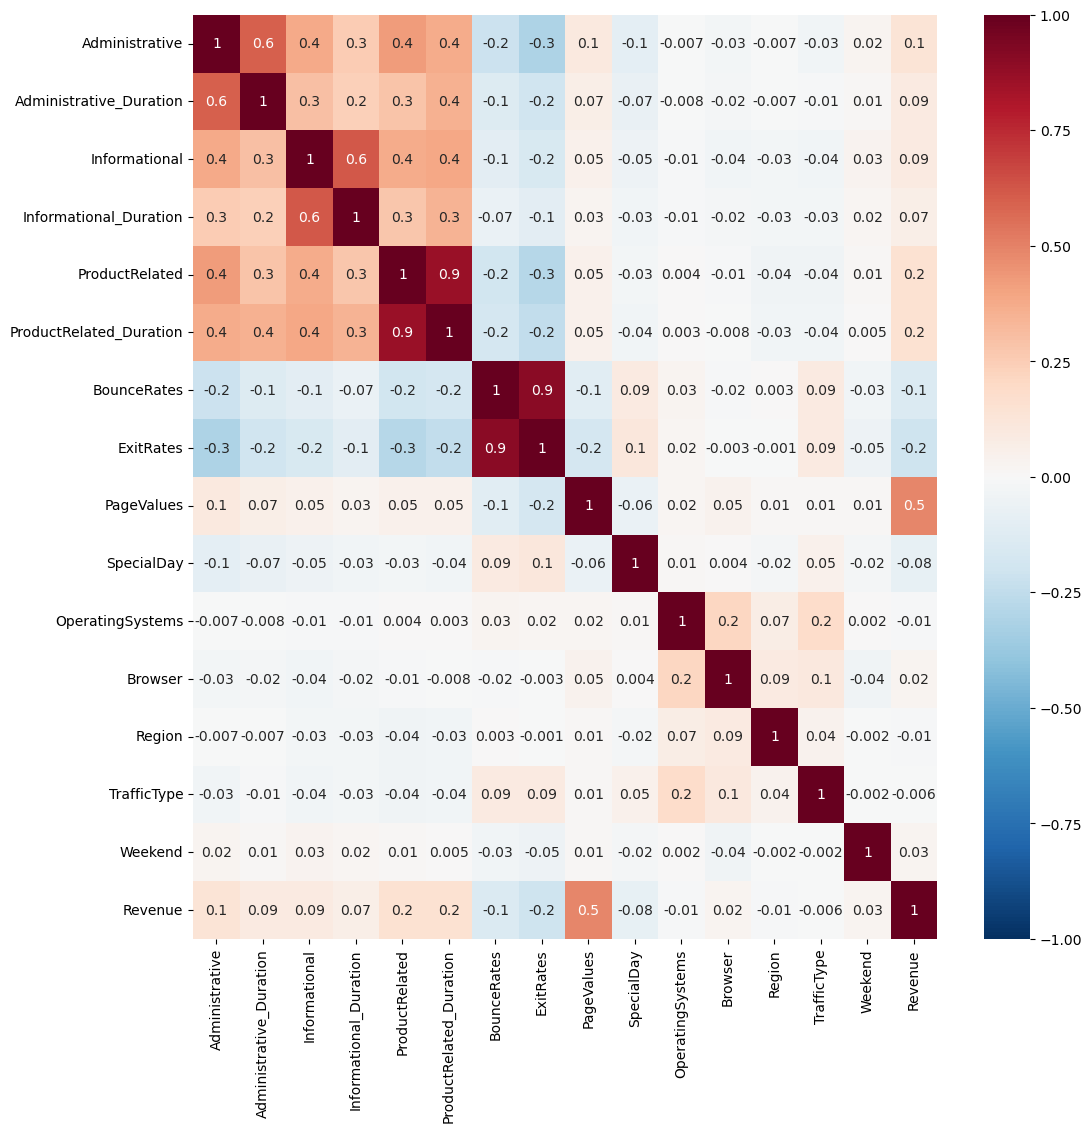

In [19]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap='RdBu_r')
plt.show()

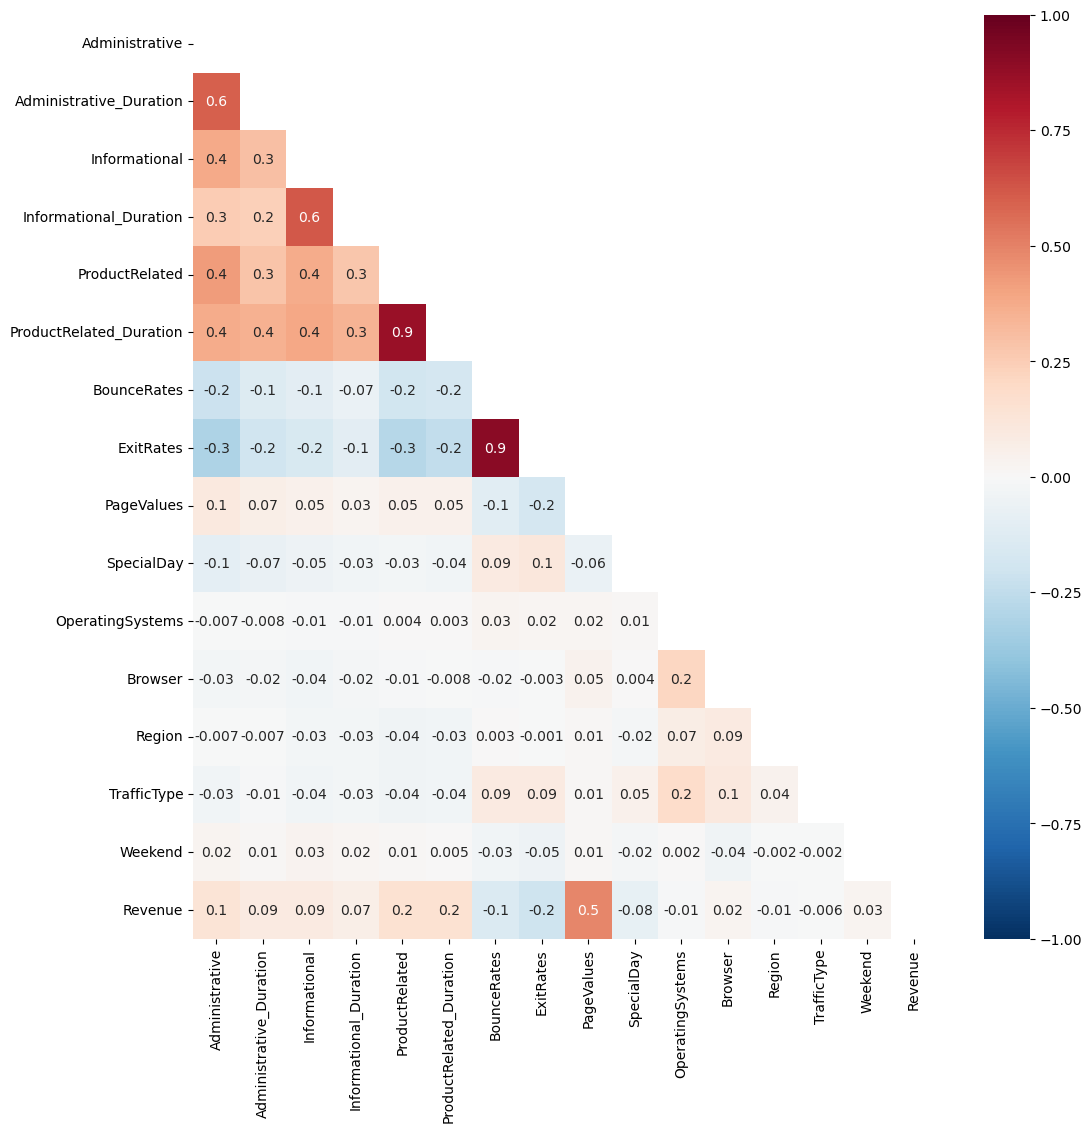

In [20]:
matrix = np.triu(data.corr())
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()

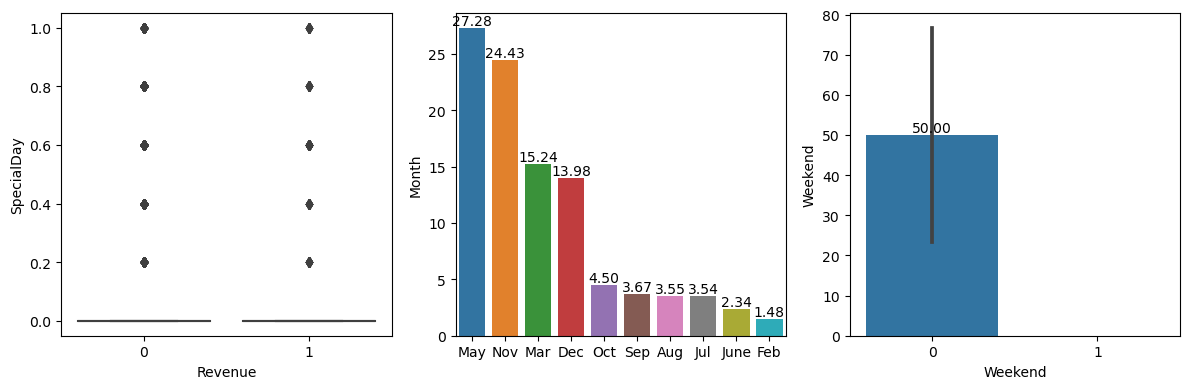

In [21]:
fig = plt.figure(figsize=(12, 4))

ax27 = fig.add_subplot(1, 3, 1)
ax28 = fig.add_subplot(1, 3, 2)
ax29 = fig.add_subplot(1, 3, 3)



sns.boxplot(data=data, x = 'Revenue', y = 'SpecialDay', ax=ax27)
xx=sns.barplot(data = data, x=data['Month'].value_counts().keys(), y=data["Month"].value_counts()/data["Month"].value_counts().sum()*100, ax=ax28)
xx.bar_label(ax28.containers[0], fontsize=10,fmt="%.2f")
xx=sns.barplot(data=data, x = data['Weekend'], y = data["Weekend"].value_counts()/data["Weekend"].value_counts().sum()*100, ax=ax29)
xx.bar_label(ax29.containers[0], fontsize=10,fmt="%.2f")


plt.tight_layout()
plt.show()

In [22]:
y = data['Revenue']
from sklearn.preprocessing import OneHotEncoder   

new_v_t = OneHotEncoder(sparse=False).fit(data['VisitorType'].values.reshape(-1, 1))  
data['VisitorType'] = new_v_t.transform(data['VisitorType'].values.reshape(-1, 1))  
X = data.drop(['Revenue'], axis=1)#,"VisitorType"
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=101)

In [23]:
#Bin-Counting编码
multi_class_var=['OperatingSystems','Browser','Region','TrafficType','Month']

def bin_counting(data_encoder):
    for feature in multi_class_var:
        # 计算每个特征值对应的正例和负例的计数
        feature_counts = pd.crosstab(X_train[feature],y_train)
        # 计算条件概率
        smoothing_factor = 1e-10 
        prob_positive = (feature_counts[1] + smoothing_factor) / (feature_counts[1] + feature_counts[0] + 2 * smoothing_factor)
        prob_negative = 1 - prob_positive
        # 计算对数优势比,对数优势比（Log Odds）是一种将概率转换为对数形式的方法，有助于处理概率接近0或1的情况。
        log_odds = np.log(prob_positive / prob_negative)
        log_odds_map = dict(zip(feature_counts.index, log_odds))
        default_log_odds = 0
        data_encoder[feature] = data_encoder[feature].map(log_odds_map).fillna(default_log_odds) 
    return data_encoder

In [24]:
X_train_bin_counted = bin_counting(X_train)
RF = RandomForestClassifier(random_state = 66)
RF.fit(X_train_bin_counted,y_train)

score = cross_val_score(RF,X_train_bin_counted,y_train,cv=5).mean()
print('交叉验证得分: %.4f'%score)

交叉验证得分: 0.8984


In [25]:
X_val_bin = bin_counting(X_val)
raw_pred = RF.predict(X_val_bin)
print('-------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, raw_pred))
print('F1 Score        : ', metrics.f1_score(y_val, raw_pred))
print('Precision       : ', metrics.precision_score(y_val, raw_pred))
print('Recall          : ', metrics.recall_score(y_val, raw_pred))
print("ROC             : ", metrics.roc_auc_score(y_val, raw_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, raw_pred))

X_test_bin = bin_counting(X_test)
raw_test_pred = RF.predict(X_test_bin)
print('-------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, raw_test_pred))
print('F1 Score        : ', metrics.f1_score(y_test, raw_test_pred))
print('Precision       : ', metrics.precision_score(y_test, raw_test_pred))
print('Recall          : ', metrics.recall_score(y_test, raw_test_pred))
print("ROC             : ", metrics.roc_auc_score(y_test, raw_test_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, raw_test_pred))

-------------------------------------
Accuracy        :  0.8651010376843256
F1 Score        :  0.6205837173579108
Precision       :  0.5958702064896755
Recall          :  0.6474358974358975
ROC             :  0.7786224911800949
Confusion Matrix:
  [[1382  137]
 [ 110  202]]
-------------------------------------
Accuracy        :  0.8918623702894594
F1 Score        :  0.6666666666666666
Precision       :  0.6226415094339622
Recall          :  0.717391304347826
ROC             :  0.8201104431706976
Confusion Matrix:
  [[1435  120]
 [  78  198]]


In [26]:
#交叉验证递归特征消除法
from sklearn.feature_selection import RFECV

#选择基模型 
model = RandomForestClassifier()

#使用RFECV进行特征选择
rfecv= RFECV(model, step=1,cv=5)   
rfecv.fit(X_train_bin_counted,y_train)
X_train_select=rfecv.transform(X_train_bin_counted)

feature_list=np.array(X_train.columns)[rfecv.get_support()]
print("最佳特征数量 : %d" % rfecv.n_features_)
print("选择特征: ",feature_list)

最佳特征数量 : 11
选择特征:  ['Administrative' 'Administrative_Duration' 'Informational_Duration'
 'ProductRelated' 'ProductRelated_Duration' 'BounceRates' 'ExitRates'
 'PageValues' 'Month' 'Region' 'TrafficType']


In [27]:
#经过调整的参数
RF_params = {"n_estimators":np.arange(91,94,1),'max_features':np.arange(2,6,1),'max_depth':np.arange(6,9,1),
             'min_samples_split':np.arange(2,4,1),'min_samples_leaf':np.arange(2,6,1)}

#实例化模型
RF = RandomForestClassifier(random_state = 66)

grid=GridSearchCV(RF,RF_params,cv=5)
grid.fit(X_train_select,y_train)

print("最佳准确率: %.4f" %grid.best_score_)
print("最佳参数:",grid.best_params_)


X_test_select=rfecv.transform(X_test_bin)
grid_pred = grid.predict(X_test_select)
print('-------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_test, grid_pred))
print('F1 Score        : ', metrics.f1_score(y_test, grid_pred))
print('Precision       : ', metrics.precision_score(y_test, grid_pred))
print('Recall          : ', metrics.recall_score(y_test, grid_pred))
print("ROC_auc         : ", metrics.roc_auc_score(y_test, grid_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_test, grid_pred))


X_val_select=rfecv.transform(X_val_bin)
grid_val_pred = grid.predict(X_val_select)
print('-------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, grid_val_pred))
print('F1 Score        : ', metrics.f1_score(y_val, grid_val_pred))
print('Precision       : ', metrics.precision_score(y_val, grid_val_pred))
print('Recall          : ', metrics.recall_score(y_val, grid_val_pred))
print("ROC_auc         : ", metrics.roc_auc_score(y_val, grid_val_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, grid_val_pred))

最佳准确率: 0.9023
最佳参数: {'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 92}
-------------------------------------
Accuracy        :  0.9082468596395412
F1 Score        :  0.7083333333333334
Precision       :  0.68
Recall          :  0.7391304347826086
ROC_auc         :  0.838697050188732
Confusion Matrix:
  [[1459   96]
 [  72  204]]
-------------------------------------
Accuracy        :  0.8820316766794102
F1 Score        :  0.6656346749226006
Precision       :  0.6437125748502994
Recall          :  0.6891025641025641
ROC_auc         :  0.8053807751388397
Confusion Matrix:
  [[1400  119]
 [  97  215]]


ref:

https://openatomworkshop.csdn.net/6746bf1e3a01316874d9467e.html